In [95]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import pickle as pkl
import statsmodels.api as sm
from scipy.stats import norm
from scipy.optimize import curve_fit
import pylab
import os
from kneed import DataGenerator, KneeLocator
from prediction_model import utils
from scipy import stats
import itertools
import math

from sklearn.linear_model import LogisticRegression

In [96]:
result_location = "/media/arjun/Shared/chaos/output_files_v2"
experiment_id = 6769589

directory = os.path.join(result_location, "rademacher_test_{}".format(experiment_id))

In [97]:
file_list = os.listdir(directory)
file_list = [ '.'.join(file.split('.')[:2]) for file in file_list if 'rademacher.pkl' in file ]
print(file_list)

['avrora-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'avrora-small-J9-d-l64-p4096-w100000i.analyzed-1', 'pmd-small-J9-d-l64-p4096-w100000i.analyzed-1', 'pmd-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'sunflow-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'luindex-small-J9-d-l64-p4096-w100000i.analyzed-1', 'luindex-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'lusearch-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'sunflow-small-J9-d-l64-p4096-w100000i.analyzed-1', 'sunflow-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'xalan-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'jython-small-J9-d-l64-p4096-w100000i.analyzed-1', 'jython-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'luindex-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'lusearch-small-J9-d-l64-p4096-w100000i.analyzed-1', 'lusearch-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'pmd-small-HotSpot-d-l64-p4096-w100000i.analyzed-1', 'avrora-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1', 'jython-small

Program: avrora-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.4168374856147317, 0.40838634994612494, 0.2388120042929768, 0.11893491854631116, 0.07921934749220721, 0.07468438420587407, 0.07498952050158687, 0.06560912313508753, 0.0688247364005594, 0.06342470904550852, 0.0574333691212575, 0.050045963438162144, 0.045091478545430004, 0.04409741565786338, 0.04285478538281927, 0.04148814554517486, 0.039888823420875213, 0.04038407187046109, 0.04062265030227795, 0.04084474531395617, 0.03980420040413188]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.40838634994612494, diff: 0.00845113566860678
param: 1984, val: 0.2388120042929768, diff: 0.16957434565314813
param: 2980, val: 0.11893491854631116, diff: 0.11987708574666564
param: 3664, val: 0.07921934749220721, diff: 0.03971

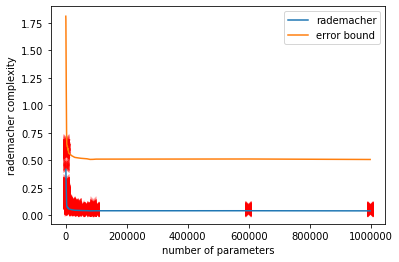

Program: avrora-small-J9-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.23847578902785668, 0.23848602976921648, 0.21106336211143076, 0.18012211731153951, 0.1675603281059871, 0.1259994312145904, 0.10463721766678387, 0.08872058888802652, 0.08288321423990473, 0.07808966999429605, 0.07674771290870527, 0.07425287604748021, 0.07477437667925572, 0.07281729634375551, 0.07188589440781785, 0.07164257178235964, 0.07135130918188647, 0.07127239464399761, 0.07267152914001834, 0.07181530531083537, 0.07048458302050407]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.23848602976921648, diff: -1.0240741359801575e-05
param: 1984, val: 0.21106336211143076, diff: 0.027422667657785726
param: 2980, val: 0.18012211731153951, diff: 0.030941244799891243
param: 3664, val: 0.1675603281059871, diff: 0.01256

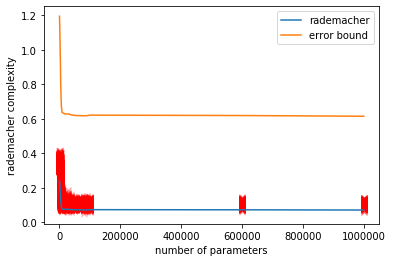

Program: pmd-small-J9-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.2548640349654086, 0.2554814078047626, 0.24047243022358208, 0.22372908414848824, 0.22361742953303326, 0.208282376912429, 0.18839899946711186, 0.16623774909650563, 0.17796530190664742, 0.15861484058506592, 0.16264554858004257, 0.13832485151585883, 0.12662383655470807, 0.12492412508681593, 0.11877839445599864, 0.11707923868780384, 0.12026081797830254, 0.11377435574926778, 0.11249330866238379, 0.11151122286838272, 0.11183431548735319]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.2554814078047626, diff: -0.0006173728393539801
param: 1984, val: 0.24047243022358208, diff: 0.0150089775811805
param: 2980, val: 0.22372908414848824, diff: 0.01674334607509384
param: 3664, val: 0.22361742953303326, diff: 0.00011165461545

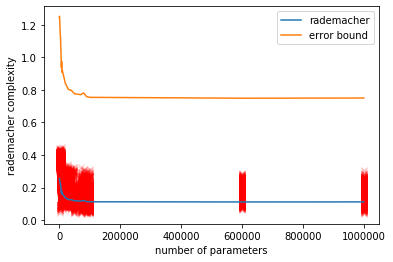

Program: pmd-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.6040539713048907, 0.6033396879583943, 0.5808513117541884, 0.5553730872669684, 0.5312902557966757, 0.5023340158744264, 0.4893891172191695, 0.4674877916433247, 0.46150176168806434, 0.45692590026847013, 0.4461182040026456, 0.42018176626755965, 0.4098781244833129, 0.3936048267035933, 0.38849650099763, 0.39565484299378684, 0.3858313838798222, 0.38332322222577264, 0.3841725959516725, 0.397010155019042, 0.39869059245439187]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.6033396879583943, diff: 0.0007142833464963694
param: 1984, val: 0.5808513117541884, diff: 0.022488376204205962
param: 2980, val: 0.5553730872669684, diff: 0.025478224487219925
param: 3664, val: 0.5312902557966757, diff: 0.024082831470292776
para

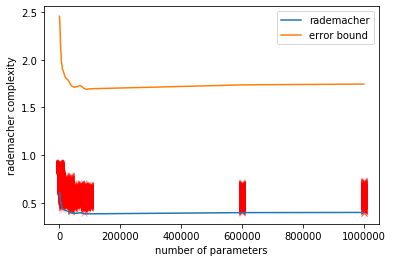

Program: sunflow-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.571580967179917, 0.5668099411645662, 0.41846557383423694, 0.3088754715129604, 0.2716393634535439, 0.22243081469098203, 0.16690104678503298, 0.1475158758092839, 0.13567088694348253, 0.13166036875570705, 0.12288143658071604, 0.10987649133876462, 0.10651087151633641, 0.10836317779270371, 0.1080186787342137, 0.10803206737060513, 0.11047355572134442, 0.11017394585806406, 0.11018765449135108, 0.11088854732365752, 0.10964719635698546]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.5668099411645662, diff: 0.004771026015350843
param: 1984, val: 0.41846557383423694, diff: 0.14834436733032924
param: 2980, val: 0.3088754715129604, diff: 0.10959010232127653
param: 3664, val: 0.2716393634535439, diff: 0.03723610805

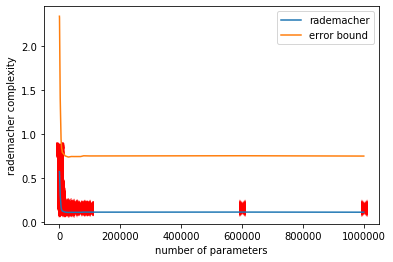

Program: luindex-small-J9-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.41856108499963063, 0.420245248850068, 0.4160183588290272, 0.4200490029769054, 0.41966198398835275, 0.4194490386006215, 0.41300416655343664, 0.41575226416896954, 0.41598025850030773, 0.4147773508786279, 0.41509081487620914, 0.4057149890726482, 0.4027424663943993, 0.40127312604173127, 0.4012012283081027, 0.4049749770113705, 0.402059945872459, 0.40205495565457317, 0.4028019727044808, 0.4060923506612363, 0.40683422500806593]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.420245248850068, diff: -0.001684163850437348
param: 1984, val: 0.4160183588290272, diff: 0.004226890021040763
param: 2980, val: 0.4200490029769054, diff: -0.004030644147878182
param: 3664, val: 0.41966198398835275, diff: 0.0003870189885526454


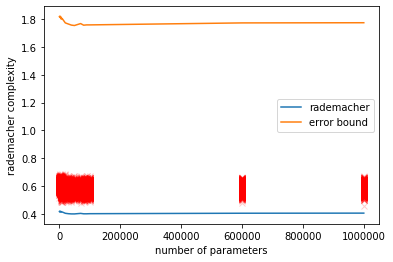

Program: luindex-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.5565222619964664, 0.5328124946487394, 0.48419902932351383, 0.47363711890126886, 0.5204941408357454, 0.5264919449791698, 0.5435972992488596, 0.5396851593206029, 0.5309960841222126, 0.538383615785737, 0.5348660136710439, 0.5235656025279957, 0.5267685175493885, 0.5210691630338485, 0.5258814013248304, 0.5205633821429149, 0.5204640665855645, 0.5205124423933889, 0.5219091420612139, 0.5237727566063854, 0.5267241073601828]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.5328124946487394, diff: 0.023709767347727007
param: 1984, val: 0.48419902932351383, diff: 0.048613465325225536
param: 2980, val: 0.47363711890126886, diff: 0.010561910422244969
param: 3664, val: 0.5204941408357454, diff: -0.04685702193447655
p

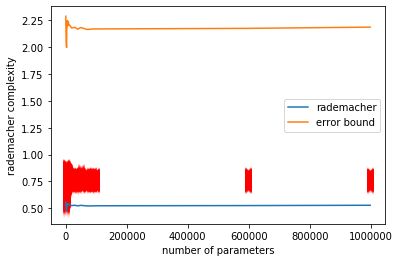

Program: lusearch-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.560703630152877, 0.5393723344503648, 0.4654761586349242, 0.3869542783635035, 0.3128522154448324, 0.2510562562937469, 0.21315627194006187, 0.17353059587592423, 0.17695062645104898, 0.15180349602800555, 0.12426684763730977, 0.07506119620319285, 0.07362492157689857, 0.07304591876755799, 0.07117878558233409, 0.06473828384204823, 0.06532165203163164, 0.0696954426797108, 0.06921260845930717, 0.06743018363378482, 0.06878582099144749]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.5393723344503648, diff: 0.021331295702512243
param: 1984, val: 0.4654761586349242, diff: 0.07389617581544061
param: 2980, val: 0.3869542783635035, diff: 0.07852188027142071
param: 3664, val: 0.3128522154448324, diff: 0.074102062918

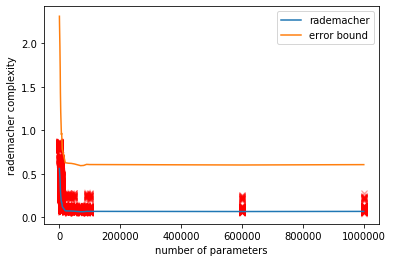

Program: sunflow-small-J9-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.5925964907790587, 0.5784509182846855, 0.452708408820428, 0.33653544193853147, 0.30750665507425196, 0.2595846265561455, 0.22592588456974722, 0.2058341674969281, 0.20432229756273387, 0.19845863595010219, 0.20617511310984324, 0.17255561617549467, 0.16994612149434812, 0.17025392230015426, 0.1617975235807937, 0.151103464352756, 0.15523329114196868, 0.1516914722216182, 0.14983857405117146, 0.14334362301092596, 0.140204405845006]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.5784509182846855, diff: 0.014145572494373204
param: 1984, val: 0.452708408820428, diff: 0.12574250946425752
param: 2980, val: 0.33653544193853147, diff: 0.11617296688189654
param: 3664, val: 0.30750665507425196, diff: 0.02902878686427951
par

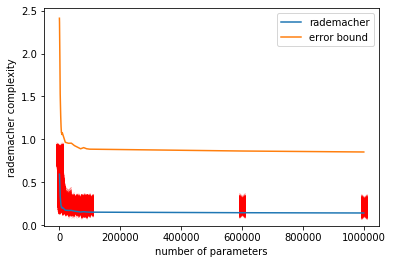

Program: sunflow-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.49079524919143536, 0.48922720453217666, 0.43694961189848025, 0.4239901901639738, 0.41937975487075657, 0.4191336976976957, 0.4143839464643507, 0.41253466979715436, 0.40945488208665254, 0.40578356859052583, 0.40594340580215577, 0.3950956938021923, 0.392165821251132, 0.392607673726422, 0.3869010377070125, 0.3861500945150976, 0.3816430086234599, 0.38593621542789264, 0.37939797152879645, 0.37652956131762155, 0.37789853487014946]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.48922720453217666, diff: 0.0015680446592586939
param: 1984, val: 0.43694961189848025, diff: 0.05227759263369641
param: 2980, val: 0.4239901901639738, diff: 0.012959421734506427
param: 3664, val: 0.41937975487075657, diff: 0.0046104352

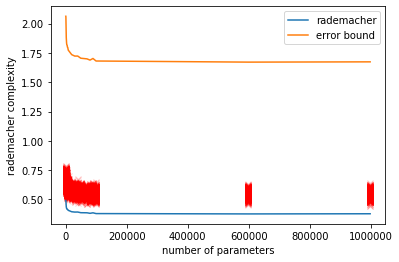

Program: xalan-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.5459190777705043, 0.5200128471383432, 0.43843430756209556, 0.4055049818671143, 0.3476978995326014, 0.32136715066280047, 0.29379223177486763, 0.2471295130709986, 0.277008530879785, 0.2179199967399105, 0.22415735936791598, 0.18877328656700104, 0.18012550940193767, 0.17715819763924381, 0.1727616316013213, 0.16144027369493413, 0.16731640801295952, 0.16320004400507185, 0.15827522539222935, 0.15440448278580532, 0.15295569545417478]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.5200128471383432, diff: 0.02590623063216113
param: 1984, val: 0.43843430756209556, diff: 0.08157853957624761
param: 2980, val: 0.4055049818671143, diff: 0.03292932569498125
param: 3664, val: 0.3476978995326014, diff: 0.0578070823345129

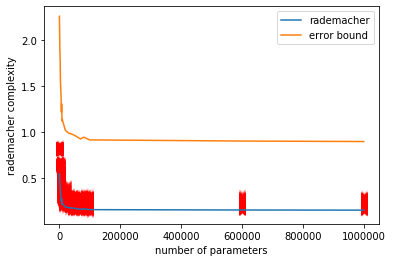

Program: jython-small-J9-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.5600403050288603, 0.559116785624311, 0.5202963823424865, 0.4842102356873213, 0.4613054906634149, 0.42488669290881886, 0.39690673327385606, 0.3504615096424911, 0.34106672058990906, 0.31089082733399764, 0.31061069963982674, 0.27901253468758147, 0.27664362653745295, 0.25545194529295606, 0.23946293260836252, 0.23051063844821557, 0.23759380410942432, 0.22948555607630486, 0.22837676130557935, 0.23133304023503182, 0.23449243195028055]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.559116785624311, diff: 0.0009235194045492667
param: 1984, val: 0.5202963823424865, diff: 0.038820403281824456
param: 2980, val: 0.4842102356873213, diff: 0.03608614665516524
param: 3664, val: 0.4613054906634149, diff: 0.02290474502390638

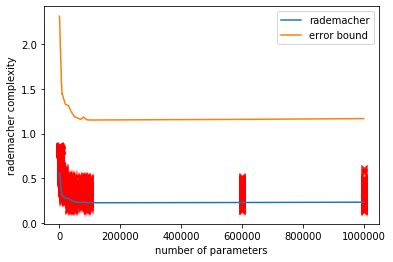

Program: jython-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.5935491752558287, 0.5891019529316609, 0.5325604836304799, 0.47346521855288154, 0.4640468836222226, 0.4197227561503509, 0.39630038919794064, 0.37923208474851333, 0.37526786056085687, 0.36751914263589863, 0.36780987857597985, 0.35343024978592846, 0.3547225430791052, 0.3512846436164997, 0.3505419558545914, 0.3516985612056619, 0.3534917200953495, 0.35571525307879165, 0.3499145385615176, 0.35898511685127366, 0.35480767115929357]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.5891019529316609, diff: 0.004447222324167832
param: 1984, val: 0.5325604836304799, diff: 0.05654146930118098
param: 2980, val: 0.47346521855288154, diff: 0.05909526507759838
param: 3664, val: 0.4640468836222226, diff: 0.009418334930658

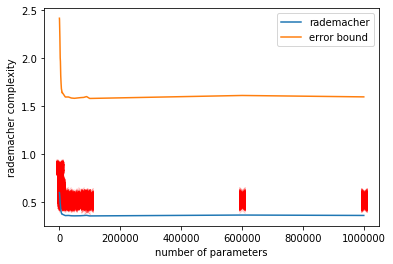

Program: luindex-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.5615713835475126, 0.5398763029765631, 0.4259108375428598, 0.34546247450461576, 0.3105579530980632, 0.2987285002268001, 0.2902913180201881, 0.2599750220873781, 0.2379568616661017, 0.24734320066583101, 0.22545934609163357, 0.13664997781227112, 0.12764240736872418, 0.11806270731920182, 0.1097851172948788, 0.09850802559167053, 0.09679150675383824, 0.0954401597041869, 0.09221167128426595, 0.09232366113257993, 0.09181258500735409]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.5398763029765631, diff: 0.021695080570949488
param: 1984, val: 0.4259108375428598, diff: 0.11396546543370328
param: 2980, val: 0.34546247450461576, diff: 0.08044836303824404
param: 3664, val: 0.3105579530980632, diff: 0.03490452140655

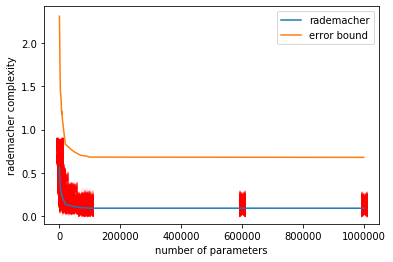

Program: lusearch-small-J9-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.5719665566407209, 0.5602581577646285, 0.406237914803683, 0.2947789345878414, 0.2554133895512669, 0.1989358940685768, 0.17038440749968797, 0.14935749768474116, 0.14408340059101724, 0.13964796324474646, 0.13598425748629278, 0.1179864722067439, 0.11553435400664817, 0.11357025874179245, 0.10760414829419114, 0.10529554128085865, 0.10349881845906458, 0.10158276378777427, 0.10222445706466049, 0.09855739707380226, 0.09750472376143338]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.5602581577646285, diff: 0.01170839887609243
param: 1984, val: 0.406237914803683, diff: 0.15402024296094552
param: 2980, val: 0.2947789345878414, diff: 0.11145898021584161
param: 3664, val: 0.2554133895512669, diff: 0.03936554503657447
p

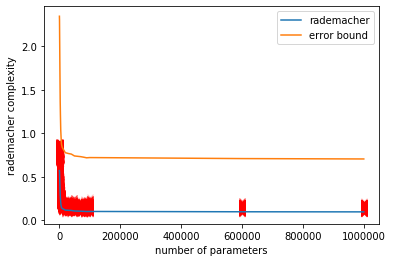

Program: lusearch-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.5332106776233486, 0.5341132409923385, 0.4680799977935544, 0.44708217864972016, 0.43375335474584303, 0.4300859526752144, 0.43112175345143366, 0.4140249101708214, 0.4108648146053895, 0.4186133314659274, 0.40551287194473373, 0.3994337023132983, 0.39718825683537934, 0.3981286277010579, 0.3987730816548231, 0.39767327421857107, 0.3956064750082179, 0.39730976500140724, 0.3943190841995624, 0.39545427098680264, 0.3968678854366114]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.5341132409923385, diff: -0.0009025633689898616
param: 1984, val: 0.4680799977935544, diff: 0.06603324319878406
param: 2980, val: 0.44708217864972016, diff: 0.02099781914383425
param: 3664, val: 0.43375335474584303, diff: 0.013328823903

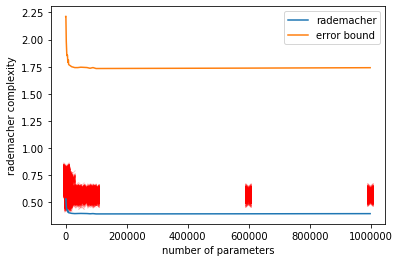

Program: pmd-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.5517262474801503, 0.5465335999478941, 0.43812447482461025, 0.3586268256866656, 0.31348666958290056, 0.2930148327186052, 0.2833902430670716, 0.26119310680388297, 0.25006646473999705, 0.2536029134630906, 0.24547349660774626, 0.19677978822770692, 0.18833848408446777, 0.17495587688432448, 0.17496307150552873, 0.15884605251880599, 0.14893740703052039, 0.14145546851022395, 0.15017370263408933, 0.12188453007956375, 0.11844096403790613]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.5465335999478941, diff: 0.005192647532256234
param: 1984, val: 0.43812447482461025, diff: 0.10840912512328382
param: 2980, val: 0.3586268256866656, diff: 0.07949764913794466
param: 3664, val: 0.31348666958290056, diff: 0.0451401561037

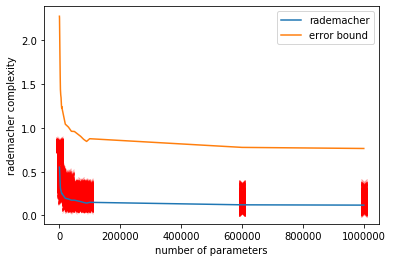

Program: avrora-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.6038966655309111, 0.6037278709071722, 0.5471232933917403, 0.463473527710679, 0.4463188850018081, 0.43856754930226677, 0.4275546783330737, 0.40431096028961655, 0.39747320693532445, 0.38180676730742497, 0.38285914723556597, 0.31049689095845245, 0.3153287187408005, 0.2940738943619535, 0.29610177905085777, 0.28011037276236767, 0.26806289448803194, 0.27744144673786514, 0.2609060517121135, 0.25874899176778593, 0.2614086610127355]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.6037278709071722, diff: 0.00016879462373897702
param: 1984, val: 0.5471232933917403, diff: 0.05660457751543191
param: 2980, val: 0.463473527710679, diff: 0.08364976568106125
param: 3664, val: 0.4463188850018081, diff: 0.017154642708870

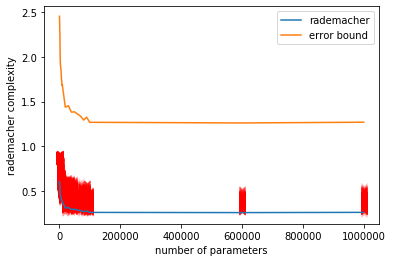

Program: jython-small-HotSpot-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.4667042087741347, 0.4774574369642857, 0.4008672072292511, 0.37933398309527816, 0.33105014903912977, 0.3053908091704763, 0.29321720163620874, 0.2923403363352305, 0.28310437889525586, 0.2848414826707219, 0.28127854936917673, 0.27324750461902275, 0.26999895257787576, 0.26881028832723625, 0.2676763230701439, 0.26045608358635375, 0.26162548028001853, 0.2638105563870446, 0.26320752258082714, 0.26021010036102393, 0.25971886782075]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.4774574369642857, diff: -0.01075322819015101
param: 1984, val: 0.4008672072292511, diff: 0.0765902297350346
param: 2980, val: 0.37933398309527816, diff: 0.02153322413397296
param: 3664, val: 0.33105014903912977, diff: 0.0482838340561483

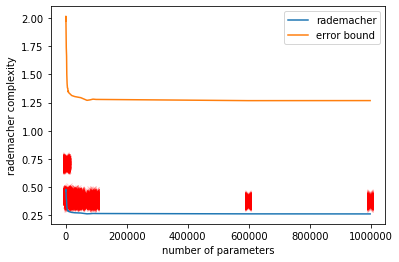

Program: xalan-small-J9-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.5494319588612719, 0.5492840806456571, 0.5333882879527226, 0.5053434245505224, 0.488194626929058, 0.45687855104137354, 0.45356111654993264, 0.450680713856931, 0.4430820663397328, 0.4409421259492355, 0.4528789453743622, 0.43020234026123183, 0.40676686429181425, 0.4147574847073517, 0.39375898119753433, 0.3825449305585856, 0.37731742154339554, 0.3810890105642331, 0.3742163605612712, 0.36137512295436836, 0.3450921586124066]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.5492840806456571, diff: 0.00014787821561479397
param: 1984, val: 0.5333882879527226, diff: 0.015895792692934507
param: 2980, val: 0.5053434245505224, diff: 0.02804486340220025
param: 3664, val: 0.488194626929058, diff: 0.017148797621464373
param: 

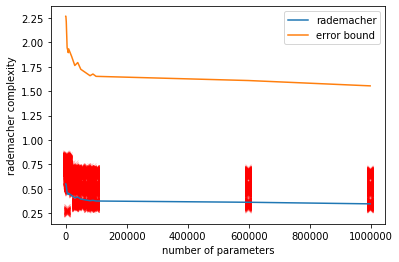

Program: xalan-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1
[404, 712, 1984, 2980, 3664, 4720, 5812, 6940, 7712, 8900, 9712, 19700, 29884, 39580, 49600, 69904, 79864, 89500, 99620, 599212, 998320]
[0.617963297389814, 0.6266795776587739, 0.6119740300725734, 0.553393225981635, 0.4908311150932102, 0.4435813209218814, 0.40504027782543583, 0.3711603252330591, 0.3953333625625638, 0.37900566006321046, 0.38180857933672313, 0.38985387251491727, 0.3948923063914516, 0.39502973638920696, 0.40044378024433025, 0.400851409318193, 0.39749983859858384, 0.40397593651048225, 0.39473981452654994, 0.4086909776904021, 0.4077644456338485]
Loss dict keys:  dict_keys([1, 2, 6, 9, 11, 14, 17, 20, 22, 25, 27, 49, 68, 84, 99, 126, 138, 149, 160, 477, 635])
param: 712, val: 0.6266795776587739, diff: -0.008716280268959875
param: 1984, val: 0.6119740300725734, diff: 0.014705547586200463
param: 2980, val: 0.553393225981635, diff: 0.058580804090938465
param: 3664, val: 0.4908311150932102, diff: 0.06256211088842478
p

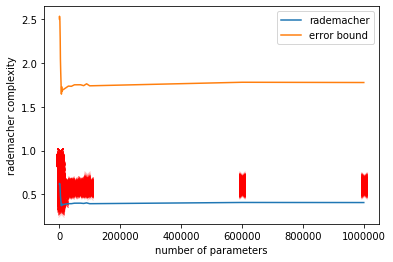

In [108]:
rademacher_dict = {}
error_bound_dict = {}
error_param_dict = {}
param_dict = {}

for program in file_list:
    print("Program: {}".format(program))
    
    with open(os.path.join(directory, "{}.pkl".format(program)), 'rb') as f:
        loss_dict = pkl.load(f)
    
    with open(os.path.join(directory, "{}.rademacher.pkl".format(program)), 'rb') as f:
        rademacher_list = pkl.load(f)
        
    with open(os.path.join(directory, "{}.errorBound.pkl".format(program)), 'rb') as f:
        error_bound_list = pkl.load(f)
    
    with open(os.path.join(directory, "{}.params.pkl".format(program)), 'rb') as f:
        param_list = pkl.load(f)
    
    with open(os.path.join(directory, "{}.result.pkl".format(program)), 'rb') as f:
        result = pkl.load(f)
    
    
    print(param_list)
    print(rademacher_list)
    
    data_x = []
    data_y = []
    print("Loss dict keys: ", loss_dict.keys())
    for idx, key in enumerate(loss_dict.keys()):
        loss_array = loss_dict[key].flatten()
        data_y.extend(loss_array.tolist())
        data_x.extend([param_list[idx]]*loss_array.shape[0])
    
    min_rad_list = [ np.min(rademacher_list[:val+1]) for val in range(len(rademacher_list)) ]
    
    for idx in range(1, len(rademacher_list)):
        print("param: {}, val: {}, diff: {}".format(param_list[idx], rademacher_list[idx], 
                                                    (rademacher_list[idx-1] - rademacher_list[idx])))
    
    program_key = '-'.join([program.split('-')[0], program.split('-')[2]])
    rademacher_dict[program_key] = result[0]
    param_dict[program_key] = result[1]
    error_bound_dict[program_key] = result[2]
    error_param_dict[program_key] = result[3]
    
    print("Result Rademacher Value: {}".format(result[0]))
    print("Result Rademacher param: {}".format(result[1]))
    print("Result Error bound value: {}".format(result[2]))
    print("Result Error bound param: {}".format(result[3]))
    
#     plt.ylim((0, 1))
    plt.xlabel("number of parameters")
    plt.ylabel("rademacher complexity")
    plt.plot(data_x, data_y, 'rx', alpha=0.2)
    plt.plot(param_list, rademacher_list, label="rademacher")
    plt.plot(param_list, error_bound_list, label="error bound")
    
#     plt.xlim((0, 2e4))
    plt.legend()
    plt.show()

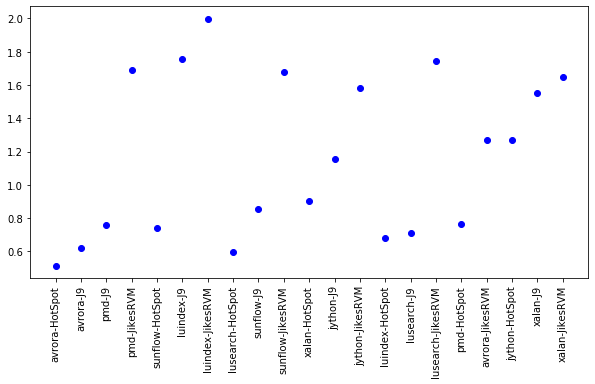

In [109]:
fig = plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.plot(list(error_bound_dict.keys()), list(error_bound_dict.values()), 'bo')

## Program with jvm order using Error bound

In [110]:
programs = np.unique([ val.split('-')[0] for val in list(error_bound_dict.keys()) ])
jvms = [ 'JikesRVM', 'J9', 'HotSpot' ]

for program in programs:
    vals = np.array([ error_bound_dict['-'.join([program, jvm])] for jvm in jvms ])
    
#     print(np.argsort(vals))
    print("{}, {}: {}".format(program, np.sort(vals), np.array(jvms)[np.array(np.argsort(vals))]))

avrora, [0.51294184 0.62175881 1.26835232]: ['HotSpot' 'J9' 'JikesRVM']
jython, [1.15815616 1.27012572 1.58219617]: ['J9' 'HotSpot' 'JikesRVM']
luindex, [0.68216623 1.75600514 1.99858646]: ['HotSpot' 'J9' 'JikesRVM']
lusearch, [0.59381279 0.70968835 1.74152607]: ['HotSpot' 'J9' 'JikesRVM']
pmd, [0.7588876  0.76534615 1.69017066]: ['J9' 'HotSpot' 'JikesRVM']
sunflow, [0.7380753  0.8515997  1.68102016]: ['HotSpot' 'J9' 'JikesRVM']
xalan, [0.90191852 1.55360987 1.6455182 ]: ['HotSpot' 'J9' 'JikesRVM']


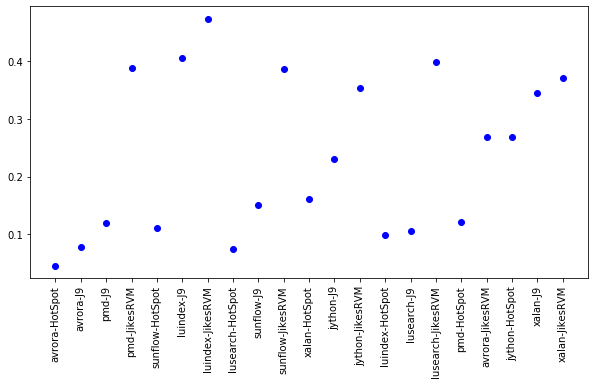

In [99]:
fig = plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.plot(list(rademacher_dict.keys()), list(rademacher_dict.values()), 'bo')

## Program with jvm order using Rademacher val

In [100]:
programs = np.unique([ val.split('-')[0] for val in list(rademacher_dict.keys()) ])
jvms = [ 'JikesRVM', 'J9', 'HotSpot' ]

for program in programs:
    vals = np.array([ rademacher_dict['-'.join([program, jvm])] for jvm in jvms ])
    
#     print(np.argsort(vals))
    print("{}, {}: {}".format(program, np.sort(vals), np.array(jvms)[np.array(np.argsort(vals))]))

avrora, [0.04509148 0.07808967 0.26806289]: ['HotSpot' 'J9' 'JikesRVM']
jython, [0.23051064 0.26881029 0.35343025]: ['J9' 'HotSpot' 'JikesRVM']
luindex, [0.09850803 0.40571499 0.47363712]: ['HotSpot' 'J9' 'JikesRVM']
lusearch, [0.07362492 0.10529554 0.3994337 ]: ['HotSpot' 'J9' 'JikesRVM']
pmd, [0.11877839 0.12188453 0.3884965 ]: ['J9' 'HotSpot' 'JikesRVM']
sunflow, [0.10987649 0.14983857 0.38615009]: ['HotSpot' 'J9' 'JikesRVM']
xalan, [0.16144027 0.34509216 0.37116033]: ['HotSpot' 'J9' 'JikesRVM']


## Program with jvm using n_params

In [101]:
jvms = [ 'JikesRVM', 'J9', 'HotSpot' ]

for program in programs:
    vals = np.array([ param_dict['-'.join([program, jvm])] for jvm in jvms ])
    
#     print(np.argsort(vals))
    print("{}, {}: {}".format(program, np.sort(vals), np.array(jvms)[np.array(np.argsort(vals))]))

avrora, [ 8900 29884 79864]: ['J9' 'HotSpot' 'JikesRVM']
jython, [19700 39580 69904]: ['JikesRVM' 'HotSpot' 'J9']
luindex, [ 2980 19700 69904]: ['JikesRVM' 'J9' 'HotSpot']
lusearch, [19700 29884 69904]: ['JikesRVM' 'HotSpot' 'J9']
pmd, [ 49600  49600 599212]: ['JikesRVM' 'J9' 'HotSpot']
sunflow, [19700 69904 99620]: ['HotSpot' 'JikesRVM' 'J9']
xalan, [  6940  69904 998320]: ['JikesRVM' 'HotSpot' 'J9']


## jvm rademacher value distribution

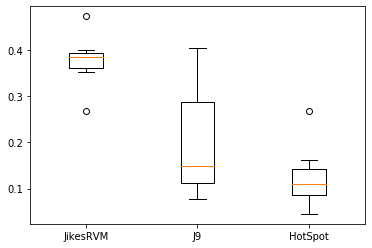

In [102]:
jvms = [ 'JikesRVM', 'J9', 'HotSpot' ]

jvm_distribution = []

for jvm in jvms:
    vals = np.array([ rademacher_dict['-'.join([program, jvm])] for program in programs ])
    
    jvm_distribution.append(vals)

plt.boxplot(jvm_distribution, labels=jvms)
plt.show()

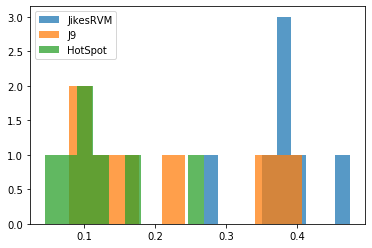

In [103]:
jvms = [ 'JikesRVM', 'J9', 'HotSpot' ]

for jvm in jvms:
    vals = np.array([ rademacher_dict['-'.join([program, jvm])] for program in programs ])
    
    plt.hist(vals, alpha=0.75, label=jvm)

plt.legend()
plt.show()

## Correlation Anlysis

In [104]:
# Correlation of rademacher with program
jvms_g = [ 'HotSpot', 'JikesRVM', 'J9' ]
programs_g = [ key.split('-')[0] for key in rademacher_dict.keys() ]

max_program_corr = (-1, 0)
max_programs = None

max_jvm_corr = (-1, 0)
max_jvm = None

Permutation:  ['HotSpot' 'JikesRVM' 'J9']


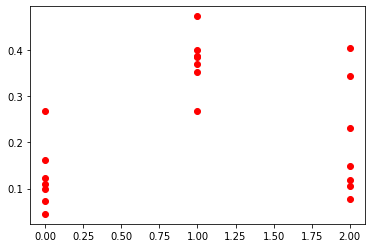

Correlation with jvm: SpearmanrResult(correlation=0.24078566516544359, pvalue=0.2930646101950366)
Permutation:  ['HotSpot' 'J9' 'JikesRVM']


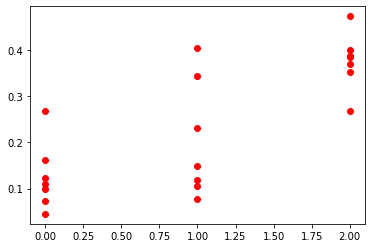

Correlation with jvm: SpearmanrResult(correlation=0.7127255688897132, pvalue=0.0002880778575261664)
Permutation:  ['JikesRVM' 'HotSpot' 'J9']


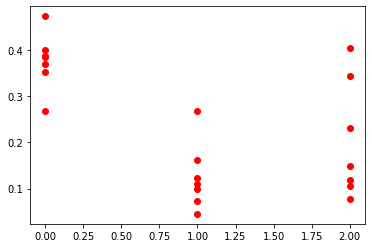

Correlation with jvm: SpearmanrResult(correlation=-0.4719399037242695, pvalue=0.030771381038084147)
Permutation:  ['JikesRVM' 'J9' 'HotSpot']


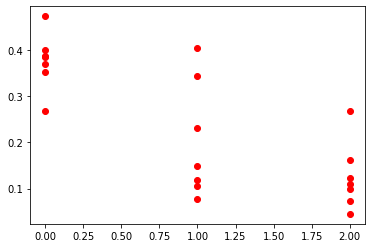

Correlation with jvm: SpearmanrResult(correlation=-0.7127255688897132, pvalue=0.0002880778575261664)
Permutation:  ['J9' 'HotSpot' 'JikesRVM']


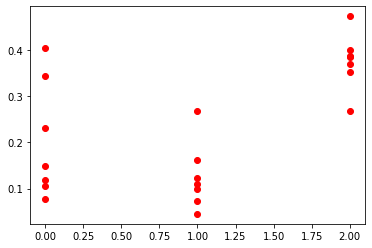

Correlation with jvm: SpearmanrResult(correlation=0.4719399037242695, pvalue=0.030771381038084147)
Permutation:  ['J9' 'JikesRVM' 'HotSpot']


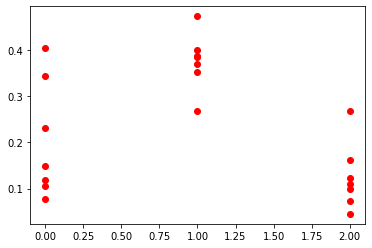

Correlation with jvm: SpearmanrResult(correlation=-0.24078566516544359, pvalue=0.2930646101950366)
Max correlation---------------
SpearmanrResult(correlation=0.7127255688897132, pvalue=0.0002880778575261664)
['HotSpot' 'J9' 'JikesRVM']


In [105]:
for jvms in itertools.permutations(jvms_g):
    jvms = np.array(jvms)

    print("Permutation: ", jvms)

    corr_rademacher = []
    corr_jvm1 = []

    for program in rademacher_dict.keys():
        corr_rademacher.append(rademacher_dict[program])
        corr_jvm1.append(program.split('-')[1])

    corr_jvm = [ np.where(np.array(jvms)==jvm)[0][0] for jvm in corr_jvm1 ]

    spearman_jvm = stats.spearmanr(np.array(corr_rademacher), np.array(corr_jvm))

    if max_jvm_corr[0] < spearman_jvm[0]:
        max_jvm_corr = spearman_jvm
        max_jvm = jvms

    plt.plot(corr_jvm, corr_rademacher, 'ro')
    plt.show()
        
    print("Correlation with jvm:", spearman_jvm)

print("Max correlation---------------")
print(max_jvm_corr)
print(max_jvm)

## Logistic regression

In [106]:
# jikes
X = np.array(list(rademacher_dict.values()))
X = X.reshape((X.shape[0], 1))

y = []
for val in rademacher_dict.keys():
    jvm_name = val.split('-')[1]
    if jvm_name == "JikesRVM":
        y.append(0)
    elif jvm_name == "J9":
        y.append(1)
    elif jvm_name == "HotSpot":
        y.append(2)
    else:
        print("Error: {}".format(jvm_name))
        
y = np.array(y)

indices = np.random.permutation(np.arange(0, X.shape[0]))

X_train = X[indices[:int(0.8*indices.shape[0])]]
y_train = y[indices[:int(0.8*indices.shape[0])]]

X_val = X[indices[int(0.8*indices.shape[0]):]]
y_val = y[indices[int(0.8*indices.shape[0]):]]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

clf.score(X_val, y_val)

(16, 1) (16,)
(5, 1) (5,)


0.4

In [107]:
clf.score(X, y)

0.5714285714285714